# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Natalie 4779
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score
from sklearn.metrics import confusion_matrix

In [3]:
# Load the training and testing datasets
trainset = pd.read_csv('wine_train.csv')
testset = pd.read_csv('wine_test.csv')

In [4]:
trainset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
testset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
#EDA 1: Statistic info for all attributes

trainset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


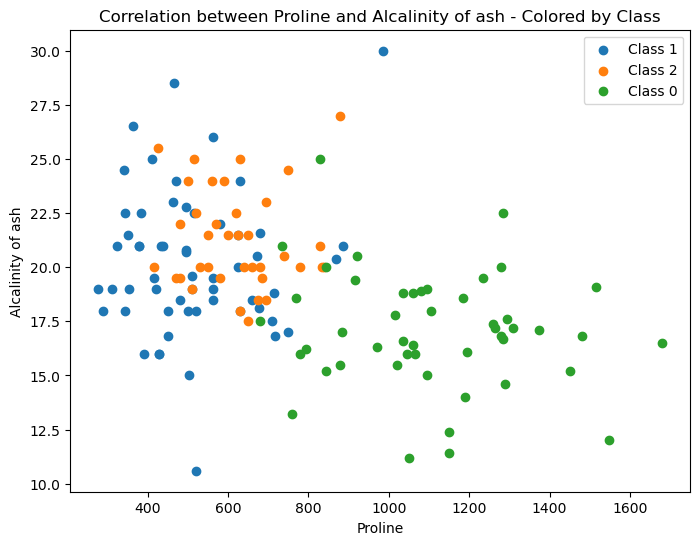

In [7]:
#EDA 2: Scatter Plot for proline and hue

plt.figure(figsize=(8,6))
for wine_class in trainset['target'].unique():
    subset = trainset[trainset['target'] == wine_class]
    plt.scatter(subset['proline'], subset['alcalinity_of_ash'], label=f'Class {wine_class}')

plt.title('Correlation between Proline and Alcalinity of ash - Colored by Class')
plt.xlabel('Proline')
plt.ylabel('Alcalinity of ash')
plt.legend()
plt.show()

Top 5 highest correlations:
total_phenols                 flavanoids       0.869634
od280/od315_of_diluted_wines  flavanoids       0.781781
                              total_phenols    0.716507
proanthocyanins               flavanoids       0.680019
proline                       alcohol          0.668455
dtype: float64


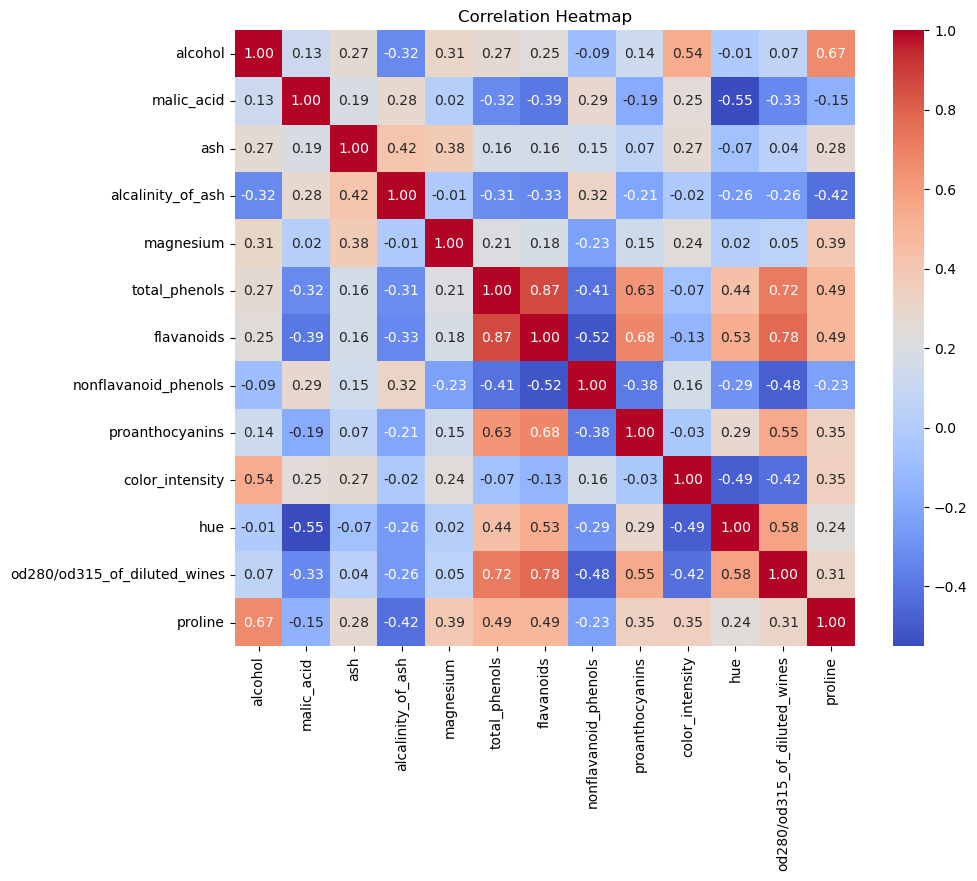

In [8]:
#EDA 3: Find attributes with highest correlation

corr_table = trainset.drop(columns=['target']).corr()
highest_correlations = corr_table.unstack().sort_values(ascending=False)
highest_correlations = highest_correlations[highest_correlations < 1].drop_duplicates()

print("Top 5 highest correlations:")
print(highest_correlations.head())

plt.figure(figsize=(10,8))
sns.heatmap(corr_table, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


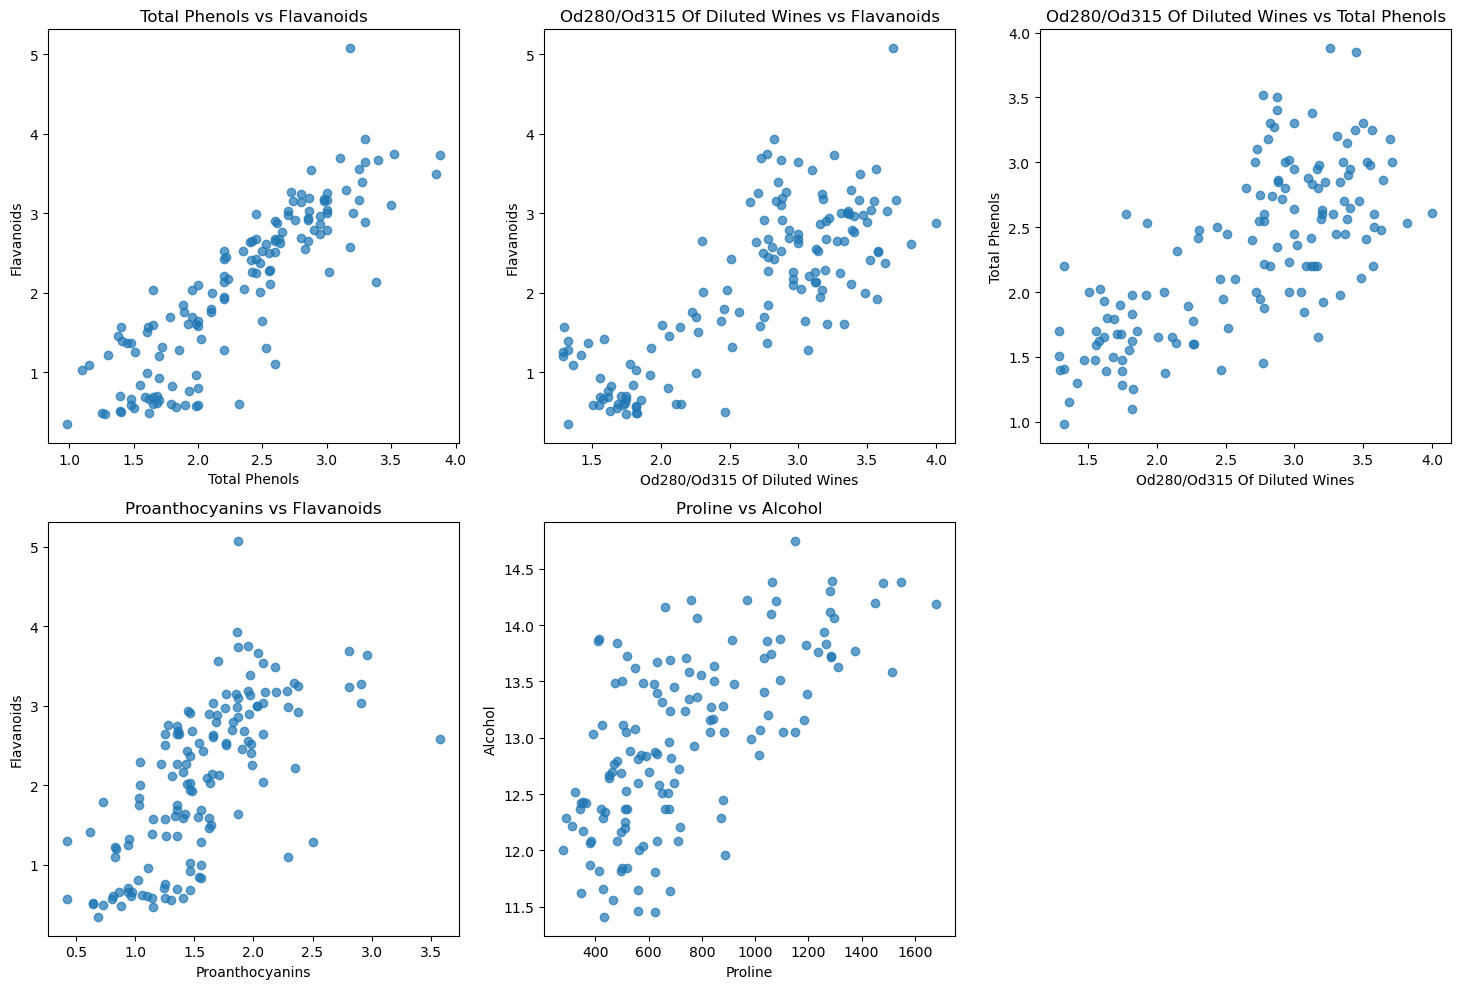

In [9]:
#EDA 4: Scatter plots for top 5 strongest correlations

top_correlations = highest_correlations.head()
attribute_pairs = [(pair[0], pair[1]) for pair in top_correlations.index]
plt.figure(figsize=(15, 10))
for i, (x_attr, y_attr) in enumerate(attribute_pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(trainset[x_attr], trainset[y_attr], alpha=0.7)
    plt.title(f'{x_attr.replace("_", " ").title()} vs {y_attr.replace("_", " ").title()}')
    plt.xlabel(x_attr.replace("_", " ").title())
    plt.ylabel(y_attr.replace("_", " ").title())
plt.tight_layout()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [10]:
# Separate features and class variable from the training set
X_trainset = trainset.drop(columns=["target"])
y_trainset = trainset["target"]

# Define the scoring metric for model evaluation
scorer = make_scorer(f1_score, average='macro')

# Define the parameter grid for K-Nearest Neighbors classifier
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'chebyshev']
}

# Define the parameter grid for Gaussian Naive Bayes classifier
nb_param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

In [11]:
def evaluate_model(classifier, param_grid, scaler):
    # Create a pipeline with a scaler and a classifier
    pipeline = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
    ])
    
    # Perform grid search with Cross-validation
    grid_search = GridSearchCV(
        pipeline,
        param_grid,
        cv=5,
        scoring=scorer
    )
    # Fit the grid search to the training data
    grid_search.fit(X_trainset, y_trainset)
    
    # Convert the grid search results to a DataFrame
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Add columns for classifier and scaler names
    results['Classifier'] = classifier.__class__.__name__
    results['Scaler'] = scaler.__class__.__name__
    
    return results

In [12]:
# Evaluate models with different classifiers and scalers
results_list = [
    evaluate_model(KNeighborsClassifier(), knn_param_grid, StandardScaler()),
    evaluate_model(KNeighborsClassifier(), knn_param_grid, MinMaxScaler()),
    evaluate_model(GaussianNB(), nb_param_grid, StandardScaler()),
    evaluate_model(GaussianNB(), nb_param_grid, MinMaxScaler())
]

# Combine all results into a single DataFrame
final_results = pd.concat(results_list, ignore_index=True)

# Select relevant columns
columns_to_display = ['Classifier', 'Scaler', 'mean_test_score', 'std_test_score'] + [col for col in final_results.columns if col.startswith('param_')]

# Display all results
final_results[columns_to_display]

,Classifier,Scaler,mean_test_score,std_test_score,param_classifier__metric,param_classifier__n_neighbors,param_classifier__weights,param_classifier__var_smoothing
0,KNeighborsClassifier,StandardScaler,0.943415,0.048044,euclidean,3,uniform,NaN
1,KNeighborsClassifier,StandardScaler,0.943415,0.048044,euclidean,3,distance,NaN
2,KNeighborsClassifier,StandardScaler,0.957701,0.051966,euclidean,5,uniform,NaN
3,KNeighborsClassifier,StandardScaler,0.957701,0.051966,euclidean,5,distance,NaN
4,KNeighborsClassifier,StandardScaler,0.958048,0.056324,euclidean,7,uniform,NaN
...,...,...,...,...,...,...,...,...
75,GaussianNB,StandardScaler,0.965529,0.052030,NaN,NaN,NaN,0.000001
76,GaussianNB,MinMaxScaler,0.965529,0.052030,NaN,NaN,NaN,0.0
77,GaussianNB,MinMaxScaler,0.965529,0.052030,NaN,NaN,NaN,0.0
78,GaussianNB,MinMaxScaler,0.965529,0.052030,NaN,NaN,NaN,0.0


In [13]:
# Display the best result for each classifier-scaler combination
best_results = final_results.loc[final_results.groupby(['Classifier', 'Scaler'])['mean_test_score'].idxmax()]
best_results[columns_to_display]

,Classifier,Scaler,mean_test_score,std_test_score,param_classifier__metric,param_classifier__n_neighbors,param_classifier__weights,param_classifier__var_smoothing
76,GaussianNB,MinMaxScaler,0.965529,0.052030,NaN,NaN,NaN,0.0
72,GaussianNB,StandardScaler,0.965529,0.052030,NaN,NaN,NaN,0.0
44,KNeighborsClassifier,MinMaxScaler,0.978968,0.042063,euclidean,13,uniform,NaN
18,KNeighborsClassifier,StandardScaler,0.971727,0.056545,manhattan,11,uniform,NaN


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [14]:
# Extract the best result configuration
best_result = best_results.iloc[0]
best_classifier = best_result['Classifier']
best_scaler = best_result['Scaler']
best_params = {k.replace('param_classifier__', ''): v for k, v in best_result.items() if k.startswith('param_classifier__') and not np.isnan(v)}

# Create the best pipeline
if best_classifier == 'KNeighborsClassifier':
    classifier = KNeighborsClassifier(**best_params)
elif best_classifier == 'GaussianNB':
    classifier = GaussianNB(**best_params)
else:
    raise ValueError(f"Unknown classifier: {best_classifier}")

if best_scaler == 'StandardScaler':
    scaler = StandardScaler()
elif best_scaler == 'MinMaxScaler':
    scaler = MinMaxScaler()
else:
    raise ValueError(f"Unknown scaler: {best_scaler}")

best_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', classifier)
])

# Fit the best pipeline on the entire training set
best_pipeline.fit(X_trainset, y_trainset)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

## Part 5 - Apply on test and show model performance estimation

In [15]:
# Separate features and class from the test set
X_testset = testset.drop(columns=["target"])
y_testset = testset["target"]

# Predict the target values using the best pipeline
y_pred = best_pipeline.predict(X_testset)

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_testset, 'Predicted': y_pred})
print(comparison_df.head())

   Actual  Predicted
0       2          2
1       0          0
2       2          2
3       1          1
4       2          2


In [16]:
# Calculate the confusion matrix to evaluate the prediction performance
conf_matrix = confusion_matrix(y_testset, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score to measure the accuracy of the predictions
f1 = f1_score(y_testset, y_pred, average='macro')
print("F1 Score:")
print(f1)

Confusion Matrix:
[[11  0  0]
 [ 0 14  0]
 [ 0  0 11]]
F1 Score:
1.0
